# Como criar um pequeno banco de dados SQL através de uma API usando Python?

Neste notebook, você poderá aprender como criar um pequeno banco de dados através de uma API, a fim de acessá-lo para fins como indexar dados em um app ou website, ou mesmo apenas organizar seus dados de forma mais estruturada do que um arquivo .csv.

Para este tutorial, vamos utilizar a API dos dados abertos da Câmara dos Deputados Federais do Brasil. Você pode conferir a documentação completa da API aqui: https://dadosabertos.camara.leg.br/swagger/api.html

Primeiro, vamos importar todas as bibliotecas que iremos utilizar para, primeiramente, conseguir os dados através da API:

In [1]:
from requests import get
import pandas as pd

Vamos explorar um pouco da API. Vamos puxar alguns dados gerais dos deputados da câmara, conforme a documentação da API. Utilizando a função *get*, podemos dar uma olhada na forma dos dados.

In [2]:
print(get("https://dadosabertos.camara.leg.br/api/v2/deputados").content[:999])

b'{"dados":[{"id":204554,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204554","nome":"Ab\xc3\xadlio Santana","siglaPartido":"PL","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/37906","siglaUf":"BA","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/204554.jpg","email":"dep.abiliosantana@camara.leg.br"},{"id":204521,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204521","nome":"Abou Anni","siglaPartido":"PSL","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/36837","siglaUf":"SP","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/bandep/204521.jpg","email":"dep.abouanni@camara.leg.br"},{"id":204379,"uri":"https://dadosabertos.camara.leg.br/api/v2/deputados/204379","nome":"Ac\xc3\xa1cio Favacho","siglaPartido":"PROS","uriPartido":"https://dadosabertos.camara.leg.br/api/v2/partidos/36763","siglaUf":"AP","idLegislatura":56,"urlFoto":"https://www.camara.leg.br/internet/deputado/ba

Para facilitar a visualização, vamos gerar um DataFrame através do Pandas.

In [3]:
df = pd.DataFrame(get("https://dadosabertos.camara.leg.br/api/v2/deputados").json()['dados']) 
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


Vamos dar uma olhada em algumas informações da tabela. A Câmara de Deputados tem, atualmente, 513 deputados. Vamos olhar se nossas informações estão completas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             513 non-null    int64 
 1   uri            513 non-null    object
 2   nome           513 non-null    object
 3   siglaPartido   513 non-null    object
 4   uriPartido     513 non-null    object
 5   siglaUf        513 non-null    object
 6   idLegislatura  513 non-null    int64 
 7   urlFoto        513 non-null    object
 8   email          513 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.2+ KB


513 deputados! Nossos dados estão completos e não há dados nulos.

Alguns dados podem não ser interessantes para nós, e por isso iremos retirá-los da tabela. Mais especificamente, iremos retirar uri, uriPartido, e idLegislatura.

In [5]:
df.drop("uri", axis=1, inplace=True)
df.drop("uriPartido", axis=1, inplace=True)
df.drop("idLegislatura", axis=1, inplace=True)
df.head()

,id,nome,siglaPartido,siglaUf,urlFoto,email
0,204554,Abílio Santana,PL,BA,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,Abou Anni,PSL,SP,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,Acácio Favacho,PROS,AP,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204560,Adolfo Viana,PSDB,BA,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,Adriana Ventura,NOVO,SP,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


Se queremos um banco de dados interno, ter as fotos dos deputados em URLs externas pode ser indesejável, e podemos, ao invés disso, utilizar fotos dentro do nosso próprio servidor para alimentar alguma aplicação. Para fazer isso, vamos baixar cada foto de cada deputado em uma pasta chamada *source*. 

In [6]:
import os
if not os.path.exists("source"):
    os.makedirs("source")

In [7]:
for url in df["urlFoto"]:
    photo_name = url.split("/")[-1]
    img_data = get(url).content
    with open("source/"+photo_name, 'wb') as handler:
        handler.write(img_data)

Agora, podemos substituir a urlFoto pela URL em nosso próprio servidor:

In [8]:
df["urlFoto"] = ["source/"+i.split("/")[-1] for i in df["urlFoto"]]
df.head()

,id,nome,siglaPartido,siglaUf,urlFoto,email
0,204554,Abílio Santana,PL,BA,source/204554.jpg,dep.abiliosantana@camara.leg.br
1,204521,Abou Anni,PSL,SP,source/204521.jpg,dep.abouanni@camara.leg.br
2,204379,Acácio Favacho,PROS,AP,source/204379.jpg,dep.acaciofavacho@camara.leg.br
3,204560,Adolfo Viana,PSDB,BA,source/204560.jpg,dep.adolfoviana@camara.leg.br
4,204528,Adriana Ventura,NOVO,SP,source/204528.jpg,dep.adrianaventura@camara.leg.br


Vamos testar se nosso link funciona:

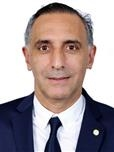

In [9]:
from IPython.display import Image
Image(filename=df["urlFoto"][150]) 

Pronto! As fotos estão prontas em nosso sistema local.

Agora, nossa tabela está pronta para ser inserida em um banco de dados SQL. Para isso, vamos utilizar o SQLite 3, uma versão mais simples do SQL para pequenos bancos de dados como o nosso.

In [10]:
import sqlite3

Vamos chamar nosso banco de dados de *deputadosDB*. Primeiramente, precisamos conectar a biblioteca SQLite3 com este banco num arquivo. Para isso, usamos o método *connect* da biblioteca:

In [11]:
connector = sqlite3.connect('deputadosDB.db')

Agora que conectamos nosso banco, precisamos de um cursor. Um cursor é uma instância que possibilita que criemos cláusulas SQL e a processemos no nosso banco.

In [12]:
cursor = connector.cursor()

Agora, vamos criar uma tabela no nosso banco de dados. Para isso, vamos usar nosso conector, porém escrevendo cláusulas SQL. Vamos criar uma tabela chamada *deputados* com as colunas correspondendo ao nosso DataFrame, porém indicando os tipos de dados adequados.

In [13]:
df.head()

,id,nome,siglaPartido,siglaUf,urlFoto,email
0,204554,Abílio Santana,PL,BA,source/204554.jpg,dep.abiliosantana@camara.leg.br
1,204521,Abou Anni,PSL,SP,source/204521.jpg,dep.abouanni@camara.leg.br
2,204379,Acácio Favacho,PROS,AP,source/204379.jpg,dep.acaciofavacho@camara.leg.br
3,204560,Adolfo Viana,PSDB,BA,source/204560.jpg,dep.adolfoviana@camara.leg.br
4,204528,Adriana Ventura,NOVO,SP,source/204528.jpg,dep.adrianaventura@camara.leg.br


In [14]:
cursor.execute("CREATE TABLE IF NOT EXISTS deputados (id int not null primary key, nome varchar(99), "+
               "siglaPartido varchar(99), siglaUF varchar(2), urlFoto varchar(50), email varchar(199))")

Já criamos nossa tabela, e agora precisamos inserir os dados. Para isso, vamos iterar as linhas (rows) do nosso DataFrame, executando uma cláusula SQL de inserção de dados na tabela a cada iteração. Aqui, é importante que a ordem das colunas escritas na cláusula SQL seja a mesma ordem das colunas do nosso DataFrame.

In [15]:
for row in df.iterrows():
    cursor.execute("INSERT INTO deputados (id, nome, siglaPartido, siglaUF, urlFoto, email) "+
    "VALUES ({})".format(','.join(['?']*len(df.columns))), tuple(row[1]))

Aqui, a cada iteração rodamos uma execução SQL para inserir os dados nas colunas especificadas. Ao invés de escrever os valores, usamos um *placeholder* para preencher os dados referentes a cada linha iterada. O *.format(', '.join(['?']*len(df.columns))* irá preencher o placeholder *{}* com pontos de interrogação separados por vírgulas. Isto é um "coringa" em SQL, e os dados passados estão em *tuple(row[1])*.

Nosso trabalho está quase terminando. Por último, tudo que precisamos fazer é dar um *commit* em todas as alterações que fizemos no banco de dados, e ele estará pronto!

In [16]:
connector.commit()